In [26]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, Dataset

In [2]:
import zipfile

path = '/content/archive.zip'
zip_ref = zipfile.ZipFile(path,'r')
zip_ref.extractall() # or leave blank to extract to current directory

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
train_path = '/content/melanoma_cancer_dataset/train'
test_path = '/content/melanoma_cancer_dataset/test'

In [5]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
dir_path = '/content/melanoma_cancer_dataset'

for dirpath, dirnames, filenames in os.walk(dir_path):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/content/melanoma_cancer_dataset'.
There are 2 directories and 0 images in '/content/melanoma_cancer_dataset/test'.
There are 0 directories and 500 images in '/content/melanoma_cancer_dataset/test/malignant'.
There are 0 directories and 500 images in '/content/melanoma_cancer_dataset/test/benign'.
There are 2 directories and 0 images in '/content/melanoma_cancer_dataset/train'.
There are 0 directories and 4605 images in '/content/melanoma_cancer_dataset/train/malignant'.
There are 0 directories and 5000 images in '/content/melanoma_cancer_dataset/train/benign'.


In [6]:
train_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
])

test_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [7]:
# Lets now load our data using ImageFolder
train_data = ImageFolder(root=train_path,
                         transform= train_transforms)
test_data = ImageFolder(root=test_path,
                        transform= test_transforms)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 9605
    Root location: /content/melanoma_cancer_dataset/train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
               RandomHorizontalFlip(p=0.5)
               RandomVerticalFlip(p=0.5)
               RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 1000
    Root location: /content/melanoma_cancer_dataset/test
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )


In [8]:
# Lets get class names as a list,
class_names = train_data.classes
class_names

['benign', 'malignant']

In [27]:
# Check the lengths
len(train_data), len(test_data)

(9605, 1000)

In [28]:
image, label = train_data[8323]
image.shape, label

(torch.Size([3, 224, 224]), 1)

Original shape: torch.Size([3, 224, 224]) -> [color_channels, height, width]
Image permute shape: torch.Size([224, 224, 3]) -> [height, width, color_channels]


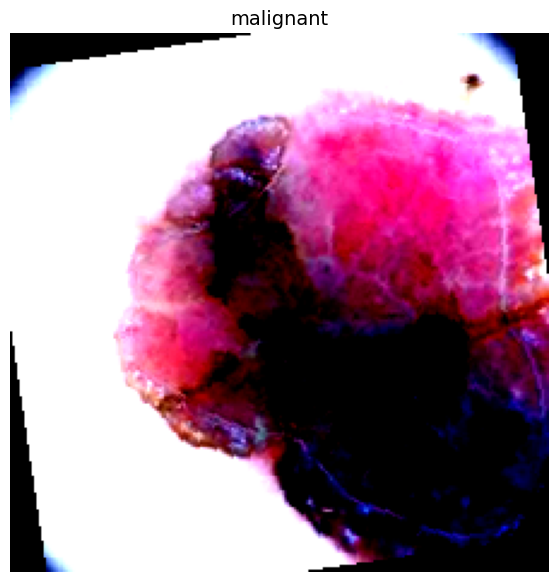

In [29]:
# Rearrange the order of dimensions
img_permute = image.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {image.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(image.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);

In [12]:
import os
# Lets now turn our data into dataloaders
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32,
                              shuffle=True,
                              num_workers= os.cpu_count(),
                              )

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             shuffle = False,
                             num_workers = os.cpu_count(),
                             )

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7d2a061439a0>,
 <torch.utils.data.dataloader.DataLoader at 0x7d2a061438e0>)

In [ ]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

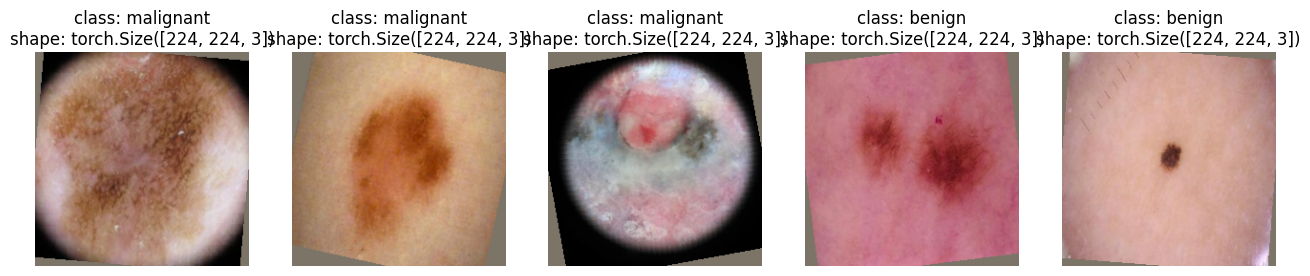

In [31]:
# 1. Take in a Dataset as well as a list of class names
import random
from typing import Tuple, Dict, List
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):

    # 2. Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")

    # 3. Set random seed
    if seed:
      random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)
        mean = torch.tensor([0.485, 0.456, 0.406])
        std = torch.tensor([0.229, 0.224, 0.225])

        targ_image_adjust = std * targ_image_adjust + mean  # Un-normalize
        targ_image_adjust = np.clip(targ_image_adjust, 0, 1)  # Clip values to keep them between 0 and 1

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

# Display random images from ImageFolder created Dataset
display_random_images(train_data,
                      n=5,
                      classes=class_names,
                      seed=None)

In [32]:
# Lets now use transfer learning on the data, we will use Resnet-50 (Pretrained)
from torchvision.models import resnet50, ResNet50_Weights
weights = ResNet50_Weights.DEFAULT
model = resnet50(weights=weights)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [33]:
!pip install torchinfo
from torchinfo import summary
summary(model,
        input_size=(32, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [32, 3, 224, 224]    [32, 1000]           --                   True
├─Conv2d (conv1)                         [32, 3, 224, 224]    [32, 64, 112, 112]   9,408                True
├─BatchNorm2d (bn1)                      [32, 64, 112, 112]   [32, 64, 112, 112]   128                  True
├─ReLU (relu)                            [32, 64, 112, 112]   [32, 64, 112, 112]   --                   --
├─MaxPool2d (maxpool)                    [32, 64, 112, 112]   [32, 64, 56, 56]     --                   --
├─Sequential (layer1)                    [32, 64, 56, 56]     [32, 256, 56, 56]    --                   True
│    └─Bottleneck (0)                    [32, 64, 56, 56]     [32, 256, 56, 56]    --                   True
│    │    └─Conv2d (conv1)               [32, 64, 56, 56]     [32, 64, 56, 56]     4,096                True
│    │    └─BatchN

In [34]:
# Freezing all layers except the fully connected layer (fc)
for name, param in model.named_parameters():
    if "fc" in name:  # Only keep the final fully connected layer trainable
        param.requires_grad = True
    else:
        param.requires_grad = False


In [35]:
num_ftrs = model.fc.in_features  # Get the number of input features to the FC layer
model.fc = nn.Linear(num_ftrs, 2)  # 2 classes for skin cancer detection (malignant vs benign)

In [36]:
# Check which layers are frozen
for name, param in model.named_parameters():
    print(f"{name}: {'Trainable' if param.requires_grad else 'Frozen'}")

conv1.weight: Frozen
bn1.weight: Frozen
bn1.bias: Frozen
layer1.0.conv1.weight: Frozen
layer1.0.bn1.weight: Frozen
layer1.0.bn1.bias: Frozen
layer1.0.conv2.weight: Frozen
layer1.0.bn2.weight: Frozen
layer1.0.bn2.bias: Frozen
layer1.0.conv3.weight: Frozen
layer1.0.bn3.weight: Frozen
layer1.0.bn3.bias: Frozen
layer1.0.downsample.0.weight: Frozen
layer1.0.downsample.1.weight: Frozen
layer1.0.downsample.1.bias: Frozen
layer1.1.conv1.weight: Frozen
layer1.1.bn1.weight: Frozen
layer1.1.bn1.bias: Frozen
layer1.1.conv2.weight: Frozen
layer1.1.bn2.weight: Frozen
layer1.1.bn2.bias: Frozen
layer1.1.conv3.weight: Frozen
layer1.1.bn3.weight: Frozen
layer1.1.bn3.bias: Frozen
layer1.2.conv1.weight: Frozen
layer1.2.bn1.weight: Frozen
layer1.2.bn1.bias: Frozen
layer1.2.conv2.weight: Frozen
layer1.2.bn2.weight: Frozen
layer1.2.bn2.bias: Frozen
layer1.2.conv3.weight: Frozen
layer1.2.bn3.weight: Frozen
layer1.2.bn3.bias: Frozen
layer2.0.conv1.weight: Frozen
layer2.0.bn1.weight: Frozen
layer2.0.bn1.bias: F

In [37]:
# Lets see
from torchinfo import summary
summary(model,
        input_size=(32, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [32, 3, 224, 224]    [32, 2]              --                   Partial
├─Conv2d (conv1)                         [32, 3, 224, 224]    [32, 64, 112, 112]   (9,408)              False
├─BatchNorm2d (bn1)                      [32, 64, 112, 112]   [32, 64, 112, 112]   (128)                False
├─ReLU (relu)                            [32, 64, 112, 112]   [32, 64, 112, 112]   --                   --
├─MaxPool2d (maxpool)                    [32, 64, 112, 112]   [32, 64, 56, 56]     --                   --
├─Sequential (layer1)                    [32, 64, 56, 56]     [32, 256, 56, 56]    --                   False
│    └─Bottleneck (0)                    [32, 64, 56, 56]     [32, 256, 56, 56]    --                   False
│    │    └─Conv2d (conv1)               [32, 64, 56, 56]     [32, 64, 56, 56]     (4,096)              False
│    │    

In [38]:
# Lets define a loss function and a optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [39]:
from tqdm import tqdm

model.to(device)

num_epochs = 10

for epoch in tqdm(range(num_epochs)):
    model.train()
    running_loss = 0
    running_corrects = 0  # Initialize correct predictions counter
    total_samples = 0  # Initialize total samples counter

    for batch_idx, (images, labels) in enumerate(train_dataloader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate predictions and accuracy
        _, preds = torch.max(outputs, 1)  # Get predicted class indices
        running_corrects += (preds == labels).sum().item()  # Count correct predictions
        total_samples += labels.size(0)  # Count total samples in the batch

        # Print every 10 batches
        if batch_idx % 10 == 0:
            batch_accuracy = (preds == labels).float().mean()  # Calculate batch accuracy
            print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx}/{len(train_dataloader)}], "
                  f"Loss: {loss.item():.4f}, Batch Accuracy: {batch_accuracy:.4f}")

    # Calculate and print epoch-level metrics
    epoch_accuracy = running_corrects / total_samples  # Calculate accuracy for the epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Average Loss: {running_loss/len(train_dataloader):.4f}, "
          f"Epoch Accuracy: {epoch_accuracy:.4f}")

torch.save(model.state_dict(), 'resnet50_finetuned.pth')

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [1/10], Batch [0/301], Loss: 0.6874, Batch Accuracy: 0.5625
Epoch [1/10], Batch [10/301], Loss: 0.6529, Batch Accuracy: 0.6562
Epoch [1/10], Batch [20/301], Loss: 0.6455, Batch Accuracy: 0.8125
Epoch [1/10], Batch [30/301], Loss: 0.5876, Batch Accuracy: 0.8125
Epoch [1/10], Batch [40/301], Loss: 0.5938, Batch Accuracy: 0.8438
Epoch [1/10], Batch [50/301], Loss: 0.5926, Batch Accuracy: 0.6875
Epoch [1/10], Batch [60/301], Loss: 0.5481, Batch Accuracy: 0.8438
Epoch [1/10], Batch [70/301], Loss: 0.5921, Batch Accuracy: 0.7500
Epoch [1/10], Batch [80/301], Loss: 0.5423, Batch Accuracy: 0.8750
Epoch [1/10], Batch [90/301], Loss: 0.5089, Batch Accuracy: 0.9375
Epoch [1/10], Batch [100/301], Loss: 0.5136, Batch Accuracy: 0.9062
Epoch [1/10], Batch [110/301], Loss: 0.5036, Batch Accuracy: 0.8125
Epoch [1/10], Batch [120/301], Loss: 0.4492, Batch Accuracy: 0.9375
Epoch [1/10], Batch [130/301], Loss: 0.4653, Batch Accuracy: 0.9062
Epoch [1/10], Batch [140/301], Loss: 0.4365, Batch Accuracy

 10%|█         | 1/10 [01:04<09:38, 64.33s/it]

Epoch [1/10], Batch [300/301], Loss: 0.2236, Batch Accuracy: 1.0000
Epoch [1/10], Average Loss: 0.4949, Epoch Accuracy: 0.8259
Epoch [2/10], Batch [0/301], Loss: 0.2957, Batch Accuracy: 0.9375
Epoch [2/10], Batch [10/301], Loss: 0.4253, Batch Accuracy: 0.8125
Epoch [2/10], Batch [20/301], Loss: 0.3677, Batch Accuracy: 0.8125
Epoch [2/10], Batch [30/301], Loss: 0.2988, Batch Accuracy: 0.9375
Epoch [2/10], Batch [40/301], Loss: 0.4490, Batch Accuracy: 0.8125
Epoch [2/10], Batch [50/301], Loss: 0.4245, Batch Accuracy: 0.8438
Epoch [2/10], Batch [60/301], Loss: 0.4642, Batch Accuracy: 0.7812
Epoch [2/10], Batch [70/301], Loss: 0.4334, Batch Accuracy: 0.8125
Epoch [2/10], Batch [80/301], Loss: 0.5467, Batch Accuracy: 0.7188
Epoch [2/10], Batch [90/301], Loss: 0.4813, Batch Accuracy: 0.8750
Epoch [2/10], Batch [100/301], Loss: 0.3672, Batch Accuracy: 0.8750
Epoch [2/10], Batch [110/301], Loss: 0.3787, Batch Accuracy: 0.7812
Epoch [2/10], Batch [120/301], Loss: 0.2775, Batch Accuracy: 0.9375


 20%|██        | 2/10 [02:06<08:26, 63.30s/it]

Epoch [2/10], Batch [300/301], Loss: 0.2886, Batch Accuracy: 1.0000
Epoch [2/10], Average Loss: 0.3566, Epoch Accuracy: 0.8736
Epoch [3/10], Batch [0/301], Loss: 0.2913, Batch Accuracy: 0.8750
Epoch [3/10], Batch [10/301], Loss: 0.3459, Batch Accuracy: 0.8438
Epoch [3/10], Batch [20/301], Loss: 0.4651, Batch Accuracy: 0.6875
Epoch [3/10], Batch [30/301], Loss: 0.4326, Batch Accuracy: 0.7812
Epoch [3/10], Batch [40/301], Loss: 0.3727, Batch Accuracy: 0.8750
Epoch [3/10], Batch [50/301], Loss: 0.3541, Batch Accuracy: 0.8125
Epoch [3/10], Batch [60/301], Loss: 0.4670, Batch Accuracy: 0.7812
Epoch [3/10], Batch [70/301], Loss: 0.3646, Batch Accuracy: 0.8750
Epoch [3/10], Batch [80/301], Loss: 0.3344, Batch Accuracy: 0.9062
Epoch [3/10], Batch [90/301], Loss: 0.3708, Batch Accuracy: 0.8750
Epoch [3/10], Batch [100/301], Loss: 0.2891, Batch Accuracy: 0.8125
Epoch [3/10], Batch [110/301], Loss: 0.2825, Batch Accuracy: 0.9062
Epoch [3/10], Batch [120/301], Loss: 0.2024, Batch Accuracy: 0.9375


 30%|███       | 3/10 [03:04<07:06, 60.86s/it]

Epoch [3/10], Batch [300/301], Loss: 0.5409, Batch Accuracy: 0.8000
Epoch [3/10], Average Loss: 0.3170, Epoch Accuracy: 0.8780
Epoch [4/10], Batch [0/301], Loss: 0.2957, Batch Accuracy: 0.8750
Epoch [4/10], Batch [10/301], Loss: 0.4025, Batch Accuracy: 0.8125
Epoch [4/10], Batch [20/301], Loss: 0.1925, Batch Accuracy: 0.9375
Epoch [4/10], Batch [30/301], Loss: 0.3087, Batch Accuracy: 0.8750
Epoch [4/10], Batch [40/301], Loss: 0.2780, Batch Accuracy: 0.8438
Epoch [4/10], Batch [50/301], Loss: 0.2806, Batch Accuracy: 0.9062
Epoch [4/10], Batch [60/301], Loss: 0.4048, Batch Accuracy: 0.8125
Epoch [4/10], Batch [70/301], Loss: 0.2253, Batch Accuracy: 0.9062
Epoch [4/10], Batch [80/301], Loss: 0.1853, Batch Accuracy: 0.9688
Epoch [4/10], Batch [90/301], Loss: 0.2280, Batch Accuracy: 0.9375
Epoch [4/10], Batch [100/301], Loss: 0.3770, Batch Accuracy: 0.8750
Epoch [4/10], Batch [110/301], Loss: 0.4423, Batch Accuracy: 0.8750
Epoch [4/10], Batch [120/301], Loss: 0.3234, Batch Accuracy: 0.9062


 40%|████      | 4/10 [04:02<05:58, 59.71s/it]

Epoch [4/10], Batch [300/301], Loss: 0.5616, Batch Accuracy: 0.8000
Epoch [4/10], Average Loss: 0.3020, Epoch Accuracy: 0.8841
Epoch [5/10], Batch [0/301], Loss: 0.1720, Batch Accuracy: 1.0000
Epoch [5/10], Batch [10/301], Loss: 0.2465, Batch Accuracy: 0.9062
Epoch [5/10], Batch [20/301], Loss: 0.3304, Batch Accuracy: 0.8750
Epoch [5/10], Batch [30/301], Loss: 0.2067, Batch Accuracy: 0.9375
Epoch [5/10], Batch [40/301], Loss: 0.2357, Batch Accuracy: 0.9375
Epoch [5/10], Batch [50/301], Loss: 0.3801, Batch Accuracy: 0.8125
Epoch [5/10], Batch [60/301], Loss: 0.2285, Batch Accuracy: 0.9375
Epoch [5/10], Batch [70/301], Loss: 0.3995, Batch Accuracy: 0.8125
Epoch [5/10], Batch [80/301], Loss: 0.2518, Batch Accuracy: 0.8750
Epoch [5/10], Batch [90/301], Loss: 0.3787, Batch Accuracy: 0.8125
Epoch [5/10], Batch [100/301], Loss: 0.2401, Batch Accuracy: 0.8438
Epoch [5/10], Batch [110/301], Loss: 0.2665, Batch Accuracy: 0.9375
Epoch [5/10], Batch [120/301], Loss: 0.2447, Batch Accuracy: 0.9062


 50%|█████     | 5/10 [05:02<04:58, 59.64s/it]

Epoch [5/10], Batch [300/301], Loss: 0.3309, Batch Accuracy: 1.0000
Epoch [5/10], Average Loss: 0.2849, Epoch Accuracy: 0.8900
Epoch [6/10], Batch [0/301], Loss: 0.4336, Batch Accuracy: 0.8750
Epoch [6/10], Batch [10/301], Loss: 0.2746, Batch Accuracy: 0.8750
Epoch [6/10], Batch [20/301], Loss: 0.1592, Batch Accuracy: 0.9688
Epoch [6/10], Batch [30/301], Loss: 0.3139, Batch Accuracy: 0.8438
Epoch [6/10], Batch [40/301], Loss: 0.2914, Batch Accuracy: 0.8750
Epoch [6/10], Batch [50/301], Loss: 0.2637, Batch Accuracy: 0.8750
Epoch [6/10], Batch [60/301], Loss: 0.2916, Batch Accuracy: 0.9062
Epoch [6/10], Batch [70/301], Loss: 0.2858, Batch Accuracy: 0.9375
Epoch [6/10], Batch [80/301], Loss: 0.2875, Batch Accuracy: 0.9062
Epoch [6/10], Batch [90/301], Loss: 0.3290, Batch Accuracy: 0.8438
Epoch [6/10], Batch [100/301], Loss: 0.3103, Batch Accuracy: 0.8125
Epoch [6/10], Batch [110/301], Loss: 0.2288, Batch Accuracy: 0.9062
Epoch [6/10], Batch [120/301], Loss: 0.3359, Batch Accuracy: 0.8438


 60%|██████    | 6/10 [06:00<03:56, 59.23s/it]

Epoch [6/10], Batch [300/301], Loss: 0.2612, Batch Accuracy: 0.8000
Epoch [6/10], Average Loss: 0.2770, Epoch Accuracy: 0.8928
Epoch [7/10], Batch [0/301], Loss: 0.1890, Batch Accuracy: 0.8750
Epoch [7/10], Batch [10/301], Loss: 0.2140, Batch Accuracy: 0.9688
Epoch [7/10], Batch [20/301], Loss: 0.2389, Batch Accuracy: 0.9062
Epoch [7/10], Batch [30/301], Loss: 0.2375, Batch Accuracy: 0.9375
Epoch [7/10], Batch [40/301], Loss: 0.3245, Batch Accuracy: 0.9062
Epoch [7/10], Batch [50/301], Loss: 0.2364, Batch Accuracy: 0.9062
Epoch [7/10], Batch [60/301], Loss: 0.2794, Batch Accuracy: 0.9062
Epoch [7/10], Batch [70/301], Loss: 0.2604, Batch Accuracy: 0.9062
Epoch [7/10], Batch [80/301], Loss: 0.1633, Batch Accuracy: 0.9375
Epoch [7/10], Batch [90/301], Loss: 0.4396, Batch Accuracy: 0.8125
Epoch [7/10], Batch [100/301], Loss: 0.2565, Batch Accuracy: 0.9062
Epoch [7/10], Batch [110/301], Loss: 0.2054, Batch Accuracy: 0.9062
Epoch [7/10], Batch [120/301], Loss: 0.2993, Batch Accuracy: 0.8750


 70%|███████   | 7/10 [06:59<02:56, 58.97s/it]

Epoch [7/10], Batch [300/301], Loss: 0.2582, Batch Accuracy: 1.0000
Epoch [7/10], Average Loss: 0.2640, Epoch Accuracy: 0.8941
Epoch [8/10], Batch [0/301], Loss: 0.3439, Batch Accuracy: 0.9062
Epoch [8/10], Batch [10/301], Loss: 0.1121, Batch Accuracy: 0.9688
Epoch [8/10], Batch [20/301], Loss: 0.2446, Batch Accuracy: 0.8750
Epoch [8/10], Batch [30/301], Loss: 0.4316, Batch Accuracy: 0.8438
Epoch [8/10], Batch [40/301], Loss: 0.3457, Batch Accuracy: 0.9062
Epoch [8/10], Batch [50/301], Loss: 0.2554, Batch Accuracy: 0.8750
Epoch [8/10], Batch [60/301], Loss: 0.2884, Batch Accuracy: 0.8750
Epoch [8/10], Batch [70/301], Loss: 0.2207, Batch Accuracy: 0.8750
Epoch [8/10], Batch [80/301], Loss: 0.3340, Batch Accuracy: 0.8750
Epoch [8/10], Batch [90/301], Loss: 0.2887, Batch Accuracy: 0.8750
Epoch [8/10], Batch [100/301], Loss: 0.3069, Batch Accuracy: 0.8438
Epoch [8/10], Batch [110/301], Loss: 0.3160, Batch Accuracy: 0.8125
Epoch [8/10], Batch [120/301], Loss: 0.2623, Batch Accuracy: 0.9062


 80%|████████  | 8/10 [07:57<01:57, 58.64s/it]

Epoch [8/10], Batch [300/301], Loss: 0.2690, Batch Accuracy: 1.0000
Epoch [8/10], Average Loss: 0.2639, Epoch Accuracy: 0.8968
Epoch [9/10], Batch [0/301], Loss: 0.2856, Batch Accuracy: 0.9062
Epoch [9/10], Batch [10/301], Loss: 0.5262, Batch Accuracy: 0.7500
Epoch [9/10], Batch [20/301], Loss: 0.1830, Batch Accuracy: 0.9375
Epoch [9/10], Batch [30/301], Loss: 0.4406, Batch Accuracy: 0.7500
Epoch [9/10], Batch [40/301], Loss: 0.3208, Batch Accuracy: 0.9062
Epoch [9/10], Batch [50/301], Loss: 0.1253, Batch Accuracy: 1.0000
Epoch [9/10], Batch [60/301], Loss: 0.2452, Batch Accuracy: 0.9375
Epoch [9/10], Batch [70/301], Loss: 0.2677, Batch Accuracy: 0.8750
Epoch [9/10], Batch [80/301], Loss: 0.1744, Batch Accuracy: 0.9062
Epoch [9/10], Batch [90/301], Loss: 0.3079, Batch Accuracy: 0.8438
Epoch [9/10], Batch [100/301], Loss: 0.2475, Batch Accuracy: 0.9375
Epoch [9/10], Batch [110/301], Loss: 0.1899, Batch Accuracy: 0.9375
Epoch [9/10], Batch [120/301], Loss: 0.1531, Batch Accuracy: 0.9375


 90%|█████████ | 9/10 [08:57<00:59, 59.04s/it]

Epoch [9/10], Batch [300/301], Loss: 0.0823, Batch Accuracy: 1.0000
Epoch [9/10], Average Loss: 0.2600, Epoch Accuracy: 0.8938
Epoch [10/10], Batch [0/301], Loss: 0.1317, Batch Accuracy: 1.0000
Epoch [10/10], Batch [10/301], Loss: 0.2239, Batch Accuracy: 0.8750
Epoch [10/10], Batch [20/301], Loss: 0.2764, Batch Accuracy: 0.8750
Epoch [10/10], Batch [30/301], Loss: 0.4081, Batch Accuracy: 0.8438
Epoch [10/10], Batch [40/301], Loss: 0.2510, Batch Accuracy: 0.9062
Epoch [10/10], Batch [50/301], Loss: 0.2351, Batch Accuracy: 0.9375
Epoch [10/10], Batch [60/301], Loss: 0.2677, Batch Accuracy: 0.8750
Epoch [10/10], Batch [70/301], Loss: 0.3012, Batch Accuracy: 0.8438
Epoch [10/10], Batch [80/301], Loss: 0.3683, Batch Accuracy: 0.8125
Epoch [10/10], Batch [90/301], Loss: 0.3575, Batch Accuracy: 0.8438
Epoch [10/10], Batch [100/301], Loss: 0.3063, Batch Accuracy: 0.8750
Epoch [10/10], Batch [110/301], Loss: 0.1501, Batch Accuracy: 0.9375
Epoch [10/10], Batch [120/301], Loss: 0.2146, Batch Accu

100%|██████████| 10/10 [09:55<00:00, 59.56s/it]

Epoch [10/10], Batch [300/301], Loss: 0.4062, Batch Accuracy: 0.8000
Epoch [10/10], Average Loss: 0.2510, Epoch Accuracy: 0.9009


In [40]:
import time
import torch
import subprocess

# Set the model to evaluation mode
model.eval()

# Variables to track total loss, total predictions, latency, and GPU usage
total_loss = 0.0
correct = 0
total = 0
latency_list = []  # List to store latencies for each batch
gpu_memory_list = []  # List to store GPU memory usage for each batch
gpu_usage_list = []  # List to store GPU usage percentages for each batch

# Disable gradient calculation for evaluation
with torch.inference_mode():
    for images, labels in test_dataloader:
        images, labels = images.to(device), labels.to(device)

        # Clear cache and synchronize GPU before starting
        torch.cuda.empty_cache()
        torch.cuda.synchronize()

        # Start time for latency measurement
        start_time = time.time()

        # Forward pass: compute predicted outputs by passing inputs to the model
        outputs = model(images)

        # Calculate the loss
        loss = loss_fn(outputs, labels)
        total_loss += loss.item()  # Accumulate the loss

        # End time for latency measurement
        end_time = time.time()

        # Calculate latency for this batch
        latency = end_time - start_time
        latency_list.append(latency)  # Store latency

        # Get GPU memory usage for this batch (in MB)
        gpu_memory = torch.cuda.memory_allocated() / (1024 ** 2)  # Convert bytes to MB
        gpu_memory_list.append(gpu_memory)

        # Capture real-time GPU usage with nvidia-smi (Linux, GPU-enabled systems)
        result = subprocess.run(['nvidia-smi', '--query-gpu=utilization.gpu', '--format=csv,noheader,nounits'],
                                stdout=subprocess.PIPE, text=True)
        gpu_usage = float(result.stdout.strip())  # Extract GPU usage percentage
        gpu_usage_list.append(gpu_usage)

        # Get the predicted class (index with highest score)
        _, predicted = torch.max(outputs, 1)

        # Update total and correct predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate average loss and accuracy
average_loss = total_loss / len(test_dataloader)
accuracy = correct / total * 100

# Calculate average latency
average_latency = sum(latency_list) / len(latency_list) if latency_list else 0

# Calculate average GPU memory usage
average_gpu_memory = sum(gpu_memory_list) / len(gpu_memory_list) if gpu_memory_list else 0

# Calculate average GPU utilization percentage
average_gpu_usage = sum(gpu_usage_list) / len(gpu_usage_list) if gpu_usage_list else 0

# Print the results
print(f'Test Loss: {average_loss:.4f}')
print(f'Test Accuracy: {accuracy:.2f}%')
print(f'Average Latency per Batch: {average_latency:.4f} seconds')
print(f'Average GPU Memory Usage per Batch: {average_gpu_memory:.2f} MB')
print(f'Average GPU Utilization per Batch: {average_gpu_usage:.2f}%')

# Optionally, also show peak GPU memory usage during evaluation
print(f'Peak GPU Memory Usage: {torch.cuda.max_memory_allocated() / (1024 ** 2):.2f} MB')


Test Loss: 0.2892
Test Accuracy: 88.60%
Average Latency per Batch: 0.0810 seconds
Average GPU Memory Usage per Batch: 243.00 MB
Average GPU Utilization per Batch: 67.03%
Peak GPU Memory Usage: 669.11 MB
